# Results check 

This notebook confirms that the results output by `src`, e.g. the synthetic data, the Kalman tracking etc. all look reasonable and nothing odd is going on 

# Setup 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

# Synthetic data 

We generate synthetic data to test our scheme. 

Lets make sure this looks reasonable 

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData

P   = SystemParameters()    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    

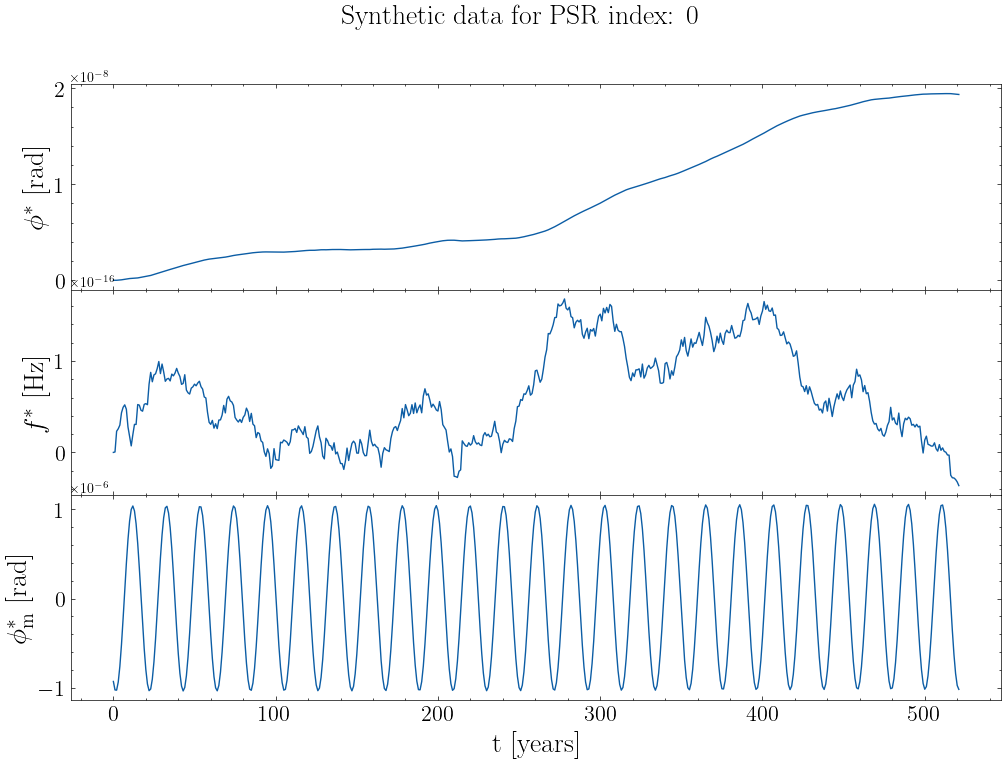

In [70]:
from plotting import plot_synthetic_data
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=0)

False

Looks reasonable. The measurement (bottom panel) looks a bit clean. We can crank the noise (need to consider what a reasonable physical value is)

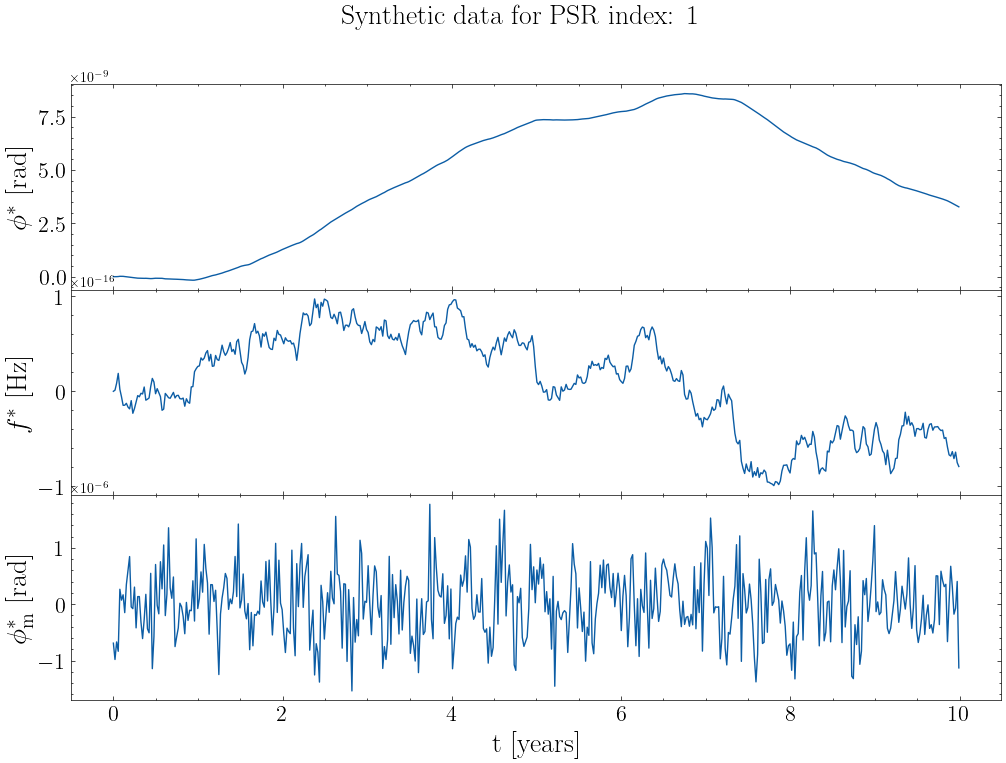

In [5]:
P   = SystemParameters(σm=5e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=1)

Notice how the states in the two above plots are identical, despite being a stochastic process.

This is because we have seeded the random-ness. If we try a different seed, the state evolution should be different:

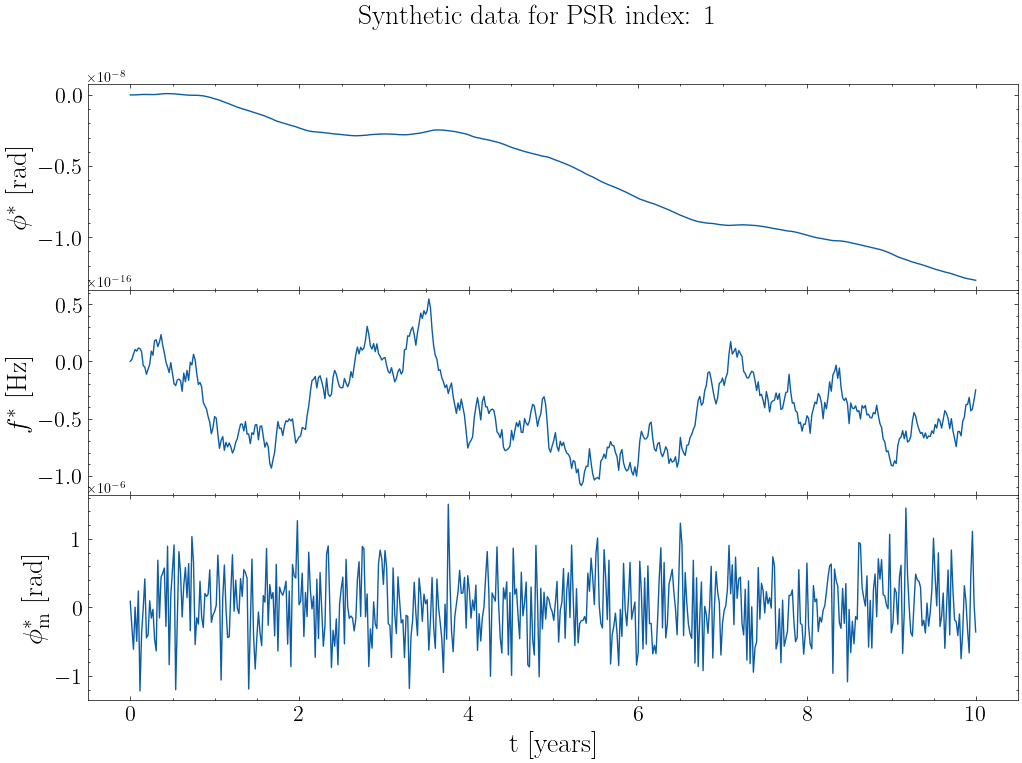

In [7]:
P   = SystemParameters(σm=5e-7,seed=1230)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=1)

# Kalman filter 

We have confirmed that our data looks ok. How does our KF do when we run it on the data? 

In [92]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import PhaseModel
from kalman_filter import KalmanFilter
from priors import bilby_priors_dict


P   = SystemParameters()    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data

#Define the model to be used by the Kalman Filter
model = PhaseModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.phi_measured,PTA)

#Run the KF with the correct parameters.
#We get the correct parameters via Bilby dictionary, looking towards when we will run this with nested sampling
optimal_parameters = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)

ll,xresults,yresults = KF.likelihood(optimal_parameters)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement model
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


5e-07
Welcome to the update function
Update results are: 0.0 [0. 0. 0. 0.]
--------------------------
[-9.27249280e-07 -4.25620738e-07]
1
Welcome to the update function
Update results are: 2.071204898323854e-11 [2.0712049e-11 2.0712049e-11 2.0712049e-11 2.0712049e-11]
--------------------------
2
Welcome to the update function
Update results are: 8.183897573873834e-11 [6.11269268e-11 6.11269268e-11 6.11269268e-11 6.11269268e-11]
--------------------------
3
Welcome to the update function
Update results are: 8.183897573873834e-11 [0. 0. 0. 0.]
--------------------------
4
Welcome to the update function
Update results are: -1.472546310036555e-10 [-2.29093607e-10 -2.29093607e-10 -2.29093607e-10 -2.29093607e-10]
--------------------------
5
Welcome to the update function
Update results are: -1.472546310036555e-10 [0. 0. 0. 0.]
--------------------------
6
Welcome to the update function
Update results are: 7.677453095898528e-11 [2.24029162e-10 2.24029162e-10 2.24029162e-10 2.24029162e-10]
-

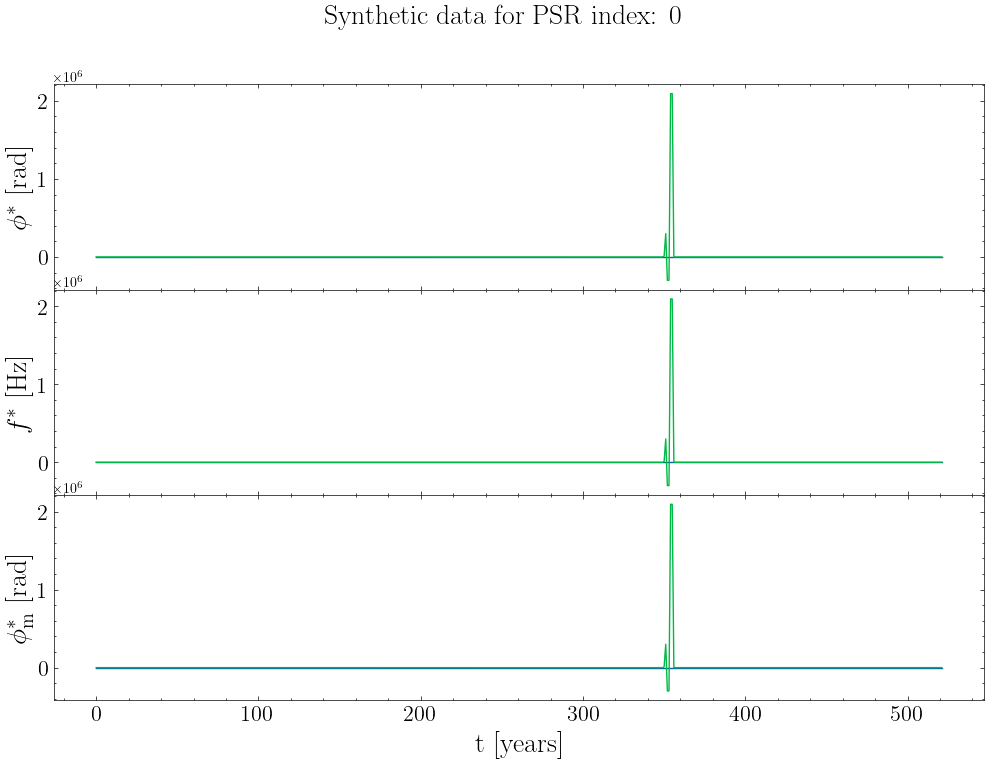

In [93]:
results_phi = xresults[:,0::2]
results_f = xresults[:,1::2] 

plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=0,state_phi_pred=results_phi,state_f_pred=results_f,phi_measured_pred=yresults)
